# Visualization 1 - States with more guns see more firearm deaths

Data Source: https://webappa.cdc.gov/sasweb/ncipc/mortrate.html
+ We downloaded the Firearm deaths by State for the year 1999 to 2017
+ We used our existing data from [github](https://raw.githubusercontent.com/srivasud/Group7/master/data/licensed_ownership_bystate.csv) for the registed firearms by State between 2010 to 2017
+ We chose year 2016 specifically for all our charts for the following reasons
   + Every aspect of our story has the same consistent year
   + Data for gun ownership and firearm deaths are not available post 2017
+ We cleaned and merged the datasets
+ Calcuated Deaths_Rate (per 100K) = (TotalDeaths/TotalPopulation)*100000 (We chose Total population instead of Adult population because the total deaths included children as well)
+ We calculated Guns_PerCapita = (Total Weapons/Total population)*1000
+ Our final cleaned dataframe output for year 2016 is given below. Here are the column descriptions.
    + State - Name of the State
    + Year	- Year of the data
    + StateCode	- 2 character abbreviation of statecode
    + Guns_PerCapita - 
    + Deaths_Rate
    + TotalDeaths
    + lawtotal
    
+ We plotted Guns_PerCapita on X-axis and Deaths_rate on Y-axis.
+ We found that Wyoming seems to be an outlier with respect to Guns_PerCapita with a value of 227 while the mean including Wyoming is 22.275. Keeping Wyoming in the data and plotting, the trend is hard to visualize as shown below in our first chart. Hence we decided to exclude Wyoming in the first chart and produced the second visualization.
+ 

In [36]:
import pandas as pd 
import numpy as np
from scipy import stats

In [37]:
# utility method to return a dataframe filtered by given year and sort by total laws descending
def show_laws_year(year,law_state):
   x = law_state[law_state['year'] == year].reset_index(drop = True)
   x = x.sort_values(by = 'lawtotal', ascending = False)
   return x

In [38]:
# prepare dataframe for the passed year
def returnProcessedDF(year):
    # Read Firearm homicide data from CDC website
    homi_state=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/FirearmHomicideByState-99-2017.csv')
    # Read Firearm suicide data from CDC website
    suicide_state=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/FirearmSuicideByState-99-2017.csv')

    # merge the two datasets by State and Year
    deaths_state=pd.merge(homi_state,suicide_state,on=["State","Year"],how='left')

    # Fill nas with zeros
    deaths_state=deaths_state.fillna(0)
    # convert SuicideDeaths to integer to avoid display 127.0
    deaths_state['SuicideDeaths']=deaths_state['SuicideDeaths'].values.astype(np.int)

    # Calculate Deaths_Rate Per 100K=(TotalDeaths/TotalPopulation)*100000 and round to 1 decimal place
    deaths_state['Deaths_Rate']=round(((deaths_state.HomicideDeaths+deaths_state.SuicideDeaths)/(deaths_state.TotalPopulation))*100000,1)

    # state abbreviation
    stateabbr=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Abbr.csv')
    # drop extra columns(not needed)
    stateabbr=stateabbr.drop(["Unnamed: 2"],axis=1)
    stateabbr=stateabbr.drop(["Unnamed: 3"],axis=1)

    # rename abbr to StateCode
    stateabbr=stateabbr.rename(columns={"state":"State","abbr":"StateCode"})

    # merge deaths by state with state abbreviation dataset
    deaths_state=pd.merge(deaths_state,stateabbr,on="State",how="inner")

    # gun ownership processing
    # read from licensed_ownership_bystate.csv
    df=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/licensed_ownership_bystate.csv')
    df.reset_index(inplace=True)
    # select State,Year and Total Weapons only
    final_dff=df[["State","Year","Total"]]
    final_dff=final_dff.drop_duplicates()

    # rename Total to Total_Firearms
    final_dff=final_dff.rename(columns={"Total":"Total_Firearms"})
    # merge deaths_state with final_dff (total firearms by state,year)
    deaths_state=pd.merge(deaths_state,final_dff,on=["State","Year"],how="inner")
    # calculate Guns_Per1000 as TotalFirearms/AdultPopulation times 1000
    deaths_state['Guns_PerCapita']=round((deaths_state['Total_Firearms']/deaths_state['TotalPopulation'])*1000)

    deaths_state = deaths_state.sort_values(by=['Guns_PerCapita','Deaths_Rate'], ascending=False)
    deaths_state['TotalDeaths']=deaths_state.HomicideDeaths+deaths_state.SuicideDeaths
    newdf = deaths_state[deaths_state.Year==year]
    max_value = newdf["Guns_PerCapita"].max()
    min_value = newdf["Guns_PerCapita"].min()
    newdf["Normalized_Guns_PerCapita"] = (newdf["Guns_PerCapita"] - min_value) / (max_value - min_value)
    newdf=newdf.sort_values(by=['Normalized_Guns_PerCapita','Deaths_Rate'], ascending=False)[['State','Year','StateCode','Guns_PerCapita','Deaths_Rate','TotalDeaths']]

    # read state wise total law counts
    law_state=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/lawsstate.csv')
    law_state_n = show_laws_year(2016,law_state)
    law_state_n=law_state_n.rename(columns={"state":"State"})
    law_state_n = law_state_n.iloc[:,[0,-1]]
    # sort values by state & show head
    law_state_n = law_state_n.sort_values(by=['State'])

    # merge the data frame
    newdf=pd.merge(newdf,law_state_n,on=["State"],how="inner")
    return newdf
#newdf[newdf.Guns_PerCapita>22.275]

/Users/srinivasanvasudevan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,State,Year,StateCode,Guns_PerCapita,Deaths_Rate,TotalDeaths,lawtotal
38,Delaware,2016,DE,5.0,11.4,109,39
12,Texas,2016,TX,21.0,11.6,3238,18
29,Maine,2016,ME,12.0,8.4,112,11
25,Minnesota,2016,MN,14.0,7.5,415,41
8,Utah,2016,UT,24.0,11.7,357,11
24,Oregon,2016,OR,15.0,12.0,492,35
1,Virginia,2016,VA,37.0,12.2,1024,13
0,Wyoming,2016,WY,227.0,16.8,98,6
37,Hawaii,2016,HI,6.0,4.1,59,79
31,Illinois,2016,IL,11.0,11.3,1450,65


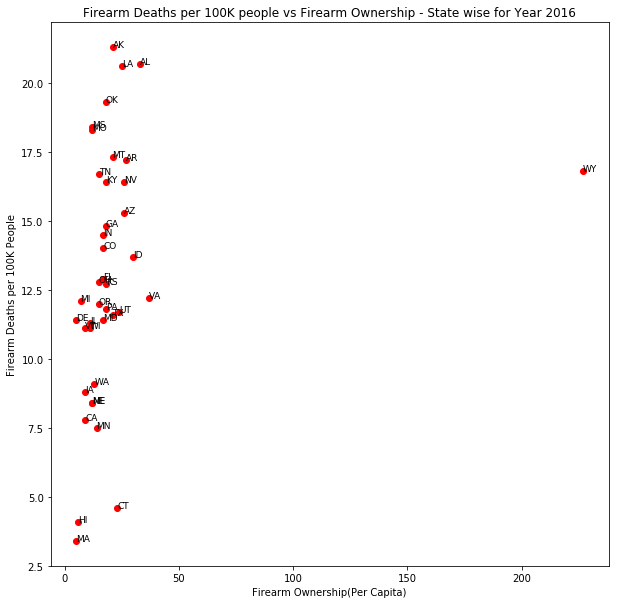

In [41]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
year=2016
newdf = returnProcessedDF(year)    # invoke the above method for year 2016


#max_value = newdf["Guns_Per1000"].max()
#min_value = newdf["Guns_Per1000"].min()
#newdf["normalized_gper1000"] = (newdf["Guns_Per1000"] - min_value) / (max_value - min_value)

# Wyoming is an outlier with Guns_Per1000 as 298 and the rest of the states
# have Guns_Per1000 < 60. Need to discuss on this. For now filtering this outlier...
#!newdf = newdf[newdf.State!='Wyoming']

X = newdf.Guns_PerCapita.values
Y = newdf.Deaths_Rate.values
n = newdf.StateCode.values

fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
        
plt.xlabel('Firearm Ownership(Per Capita)')
plt.ylabel('Firearm Deaths per 100K People')
plt.title('Firearm Deaths per 100K people vs Firearm Ownership - State wise for Year '+str(year))
newdf.sample(10)

/Users/srinivasanvasudevan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0.5, 1.0, 'Firearm Deaths per 100K people vs Firearm Ownership - State wise for Year 2016 Excluding Wyoming')

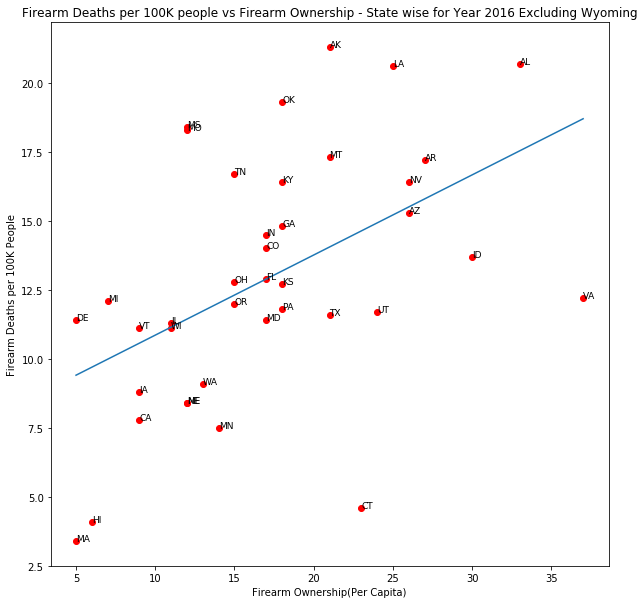

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
year=2016
newdf = returnProcessedDF(year)    # invoke the above method for year 2016


#max_value = newdf["Guns_Per1000"].max()
#min_value = newdf["Guns_Per1000"].min()
#newdf["normalized_gper1000"] = (newdf["Guns_Per1000"] - min_value) / (max_value - min_value)

# Wyoming is an outlier with Guns_Per1000 as 298 and the rest of the states
# have Guns_Per1000 < 60. Need to discuss on this. For now filtering this outlier...
newdf = newdf[newdf.State!='Wyoming']

X = newdf.Guns_PerCapita.values
Y = newdf.Deaths_Rate.values
n = newdf.StateCode.values

fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
        
plt.xlabel('Firearm Ownership(Per Capita)')
plt.ylabel('Firearm Deaths per 100K People')
plt.title('Firearm Deaths per 100K people vs Firearm Ownership - State wise for Year '+str(year)+' Excluding Wyoming')

# Visualization 2

In [13]:
# Read data from fire arm laws by state
df=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/lawsstate.csv')
#http://www.statefirearmlaws.org/national-data/2016

In [14]:
# for Year 2016
def show_laws(year):
   x = df[df['year'] == year].reset_index(drop = True)
   x = x.sort_values(by = 'lawtotal', ascending = False)
   return x


In [15]:
# Type in the year for data you want
df1 = show_laws(2016)

In [16]:
# only need the last column with total laws
df2 = df1.iloc[:,[0,-1]]

In [17]:
# sort values by state & show head
df3 = df2.sort_values(by=['state'])
df3.head(2)

,state,lawtotal
0,Alabama,10
1,Alaska,3


### 2nd file - Gun death per 100K residents by state for 2016

In [18]:
# Read data
Gunrate=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/yr2016firearmdeathrate.csv')
#https://www.kff.org/other/state-indicator/firearms-death-rate-per-100000/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D

In [19]:
# drop unwanted rows
Gunrate = Gunrate.loc[1:51:]

In [20]:
# Rename the column
cols=['state','rate']
Gunrate.columns=cols
Gunrate.head(3)

,state,rate
1,Alabama,21.5
2,Alaska,23.3
3,Arizona,15.2


In [21]:
# reset index and drop unwanted column
Gunrate.reset_index(inplace=True)
Gunrate.drop(['index'],axis=1,inplace=True)

In [22]:
Gunrate.sort_values(by=['state'])
Gunrate.head(3)

,state,rate
0,Alabama,21.5
1,Alaska,23.3
2,Arizona,15.2


### Get State abbreviations

In [23]:
# Read state abbreviations from excel file
stateabbr=pd.read_csv('https://raw.githubusercontent.com/srivasud/Group7/master/data/Abbr.csv')

In [24]:
stateabbr.sort_values(by=['state'])
stateabbr.head(2)

,state,abbr,Unnamed: 2,Unnamed: 3
0,Alabama,AL,NaN,NaN
1,Alaska,AK,NaN,NaN


### concat data frames into one

In [25]:
# Concat all the dataframes into one
total=pd.concat([df3,Gunrate])

/Users/srinivasanvasudevan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [26]:
#group by state 
statelaw_rate = total.groupby('state')['lawtotal','rate',].max()

In [27]:
# get rid of NA
statelaw_rate['rate'] = statelaw_rate.rate.fillna(0)

In [28]:
# get rid of NA
statelaw_rate['lawtotal'] = statelaw_rate.lawtotal.fillna(0)

In [29]:
# reset index
statelaw_rate.reset_index(inplace=True)

In [30]:
# sort by state
statelaw_rate.sort_values(by=['state']).head(2)

,state,lawtotal,rate
0,Alabama,10.0,21.5
1,Alaska,3.0,23.3


### create graph

In [31]:
# list of state abbreviations 
my_list = stateabbr.abbr.values

In [32]:
x = statelaw_rate.lawtotal

In [33]:
y = statelaw_rate.rate

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)

Text(0.5, 1.0, 'Gun Laws vs. Gun Deaths')

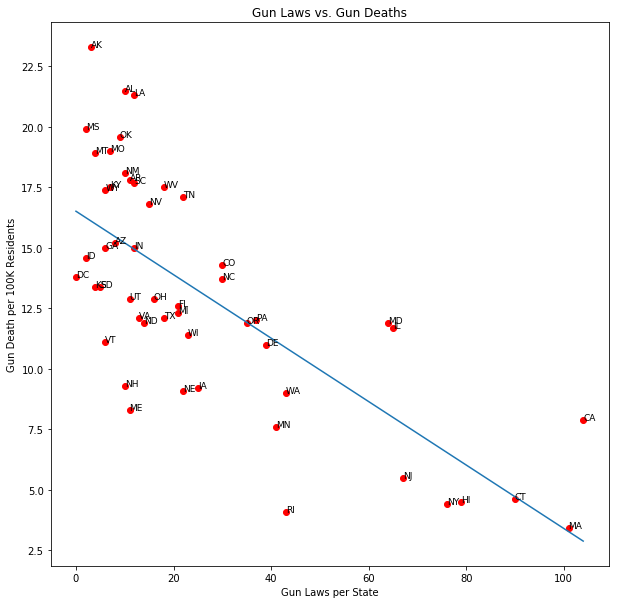

In [35]:
# MY GRAPH NEEDS X AXIS LAWS Y AXIS GUN DEATHS
Y = y
X = x
n = my_list


fig, ax = plt.subplots()
ax.scatter(X, Y, color='red')
for i, txt in enumerate(n):
    ax.annotate(txt, (X[i], Y[i]), fontsize=9 )
    
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))
    
plt.xlabel('Gun Laws per State')
plt.ylabel('Gun Death per 100K Residents')
plt.title('Gun Laws vs. Gun Deaths')
